<a href="https://colab.research.google.com/github/Katrin-Leberfinger/Hybrid-gender-debiased-music-recommendation/blob/main/001_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 8.2 MB/s 
     |████████████████████████████████| 6.6 MB 59.5 MB/s 
     |████████████████████████████████| 86 kB 6.3 MB/s 
     |████████████████████████████████| 596 kB 91.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
import torch
import numpy as np
import torch.nn as nn
from torch.autograd import Variable
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertModel, AdamW
from torch import nn
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

# Read Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cd /content/drive/MyDrive/Master\ Thesis/data

/content/drive/MyDrive/Master Thesis/data


In [16]:
data_tracks_lyrics = pd.read_csv("music/data_tracks_lyrics.txt", sep="\t").drop(['Unnamed: 0'],axis=1).dropna()
data_tracks_tags_lyrics = pd.read_csv("music/data_tracks_tags_lyrics.txt", sep="\t").drop(['Unnamed: 0'],axis=1).dropna().drop_duplicates('track_id')
data_bio = pd.read_csv("music/data_artists_biography.txt", sep=",").drop(['Unnamed: 0'],axis=1).dropna()
data_interaction = pd.read_csv("music/data_user_track_interaction_old.txt", sep="\t").drop(['Unnamed: 0'],axis=1)

data_tracks_tags_lyrics = data_tracks_tags_lyrics.merge(data_bio)
data_interaction = data_interaction.merge(data_tracks_tags_lyrics[['track_id']].drop_duplicates(), on = 'track_id', how = 'inner').drop_duplicates()
data_tracks_tags_lyrics = data_tracks_tags_lyrics.merge(data_interaction[['track_id']], on = 'track_id', how = 'inner').drop_duplicates()

data_user = pd.read_csv("music/data_user.txt", sep="\t").drop(['Unnamed: 0'],axis=1)

In [ ]:
# data_movies = pd.read_csv("movies/movies_abstracts.csv").drop(['Unnamed: 0'],axis=1).dropna()
# data_interaction = pd.read_csv("movies/ratings.csv").drop(['timestamp'],axis=1)

# data_movies = pd.merge(data_movies, data_interaction[['movieId']], 'inner').drop_duplicates()
# data_interaction = pd.merge(data_interaction, data_movies[['movieId']], 'inner')

# data_movies.columns = ['track_id', 'lyrics_cleaned', 'tags', 'abstract']
# data_tracks_tags_lyrics = data_movies

# data_interaction.columns = ['user_id', 'track_id', 'count']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


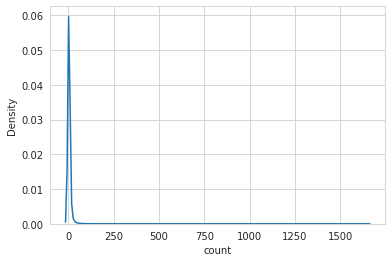

In [9]:
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(data_interaction['count'], bw=0.5)

In [27]:
data_interaction_plot = data_interaction

In [76]:
# filter out playcount 1
data_interaction = data_interaction[data_interaction['count'] != 1]

#data_interaction.loc[data_interaction['count']<2., 'count'] = 0.
data_interaction.loc[data_interaction['count']>=2., 'count'] = 1.

In [ ]:
# data_interaction.loc[data_interaction['count']<4., 'count'] = 0.
# data_interaction.loc[data_interaction['count']>=4., 'count'] = 1.

In [77]:
# filter out users with too little playcount
df_per_users = data_interaction.groupby(['user_id']).size().reset_index(name='counts')
users = df_per_users[df_per_users['counts'] >= 5]['user_id'].values
data_interaction = data_interaction[data_interaction['user_id'].isin(users)]

In [78]:
# filter out tracks with too little playcount
df_per_track = data_interaction.groupby(['track_id']).size().reset_index(name='counts')
tracks = df_per_track[df_per_users['counts'] >= 5]['track_id'].values
data_interaction = data_interaction[data_interaction['track_id'].isin(tracks)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


## CV and balance data set

In [86]:
# add negative samples
import random
random.seed(123)
data_interaction_new = pd.DataFrame(columns = data_interaction.columns)
for user_id,df in data_interaction.groupby('user_id'):
  n_diff = len(df[df['count'] == 1]) - len(df[df['count'] == 0])
  if n_diff > 1:
    df_tmp = df.merge(data_interaction[['track_id']], how = 'right')
    neg_list = random.sample(list(df_tmp[np.isnan(df_tmp.user_id)].track_id.values), n_diff)
    df_neg = pd.DataFrame({'user_id': user_id, 'track_id':neg_list, 'count':0})
    data_interaction_new=data_interaction_new.append(df)
    data_interaction_new=data_interaction_new.append(df_neg)
  else:
    data_interaction_new = data_interaction_new.append(df)

data_interaction_new = shuffle(data_interaction_new)

In [ ]:
# data_interaction_new = data_interaction
# data_interaction_new = shuffle(data_interaction_new)

In [98]:
data_interaction_new = data_interaction_new.merge(data_tracks_tags_lyrics[['track_id', 'lyrics_cleaned', 'tags', 'abstract']]).drop_duplicates()

In [100]:
data_tracks_tags_lyrics = data_tracks_tags_lyrics.merge(data_interaction_new[['track_id']]).drop_duplicates()

In [ ]:
# rating_col = 'count'
# item_col = 'track_id'
# user_col = 'user_id'
# data_items_eval = data_tracks_tags_lyrics

In [102]:
np.random.seed(123)
data_interaction_new['fold'] = np.random.randint(1, 6, data_interaction_new.shape[0])

In [130]:
test_fold = 1
val_fold = 2

data_interaction_train = data_interaction_new.loc[((data_interaction_new.fold != test_fold) & (data_interaction_new.fold != val_fold)), ['user_id', 'track_id', 'count', 'lyrics_cleaned', 'tags', 'abstract']]
data_interaction_test = data_interaction_new.loc[data_interaction_new.fold == test_fold, ['user_id', 'track_id', 'count', 'lyrics_cleaned', 'tags', 'abstract']]
data_interaction_val = data_interaction_new.loc[data_interaction_new.fold == val_fold,  ['user_id', 'track_id', 'count', 'lyrics_cleaned', 'tags', 'abstract']]

In [133]:
# itermin solution (maybe change later)
selected_user = []
data_interaction_test_new = pd.DataFrame()
for user_id,df in data_interaction_test.groupby('user_id'):
  if df['count'].sum() >= 10:
    df_tmp = df.merge(data_tracks_tags_lyrics[['track_id']].drop_duplicates(), how = 'right').drop_duplicates()
    items_to_ignore = data_interaction_train[(data_interaction_train['user_id'] == user_id) & (data_interaction_train['count'] == 1)]['track_id'].values
    df_tmp = df_tmp[~df_tmp['track_id'].isin(items_to_ignore)]
    neg_list = list(set(df_tmp.loc[df_tmp.isna().any(axis=1),].track_id.values))
    df_neg = pd.DataFrame({'user_id': user_id, 'track_id':neg_list, 'count':0})
    data_interaction_test_new=data_interaction_test_new.append(df_neg)
    selected_user.append(user_id)
  
data_interaction_test = data_interaction_test_new
data_interaction_test = data_interaction_test[['user_id', 'track_id', 'count']].merge(data_tracks_tags_lyrics[['track_id', 'lyrics_cleaned', 'tags', 'abstract']], on = 'track_id', how = 'left').drop_duplicates()
data_interaction_test = data_interaction_test.loc[(data_interaction_test.user_id.isin(selected_user))]
data_interaction_test = shuffle(data_interaction_test)

In [139]:
dir = "preprocessed_data/"

In [140]:
data_interaction.to_csv(dir + 'data_interaction.csv', encoding = 'utf-8-sig') 
data_tracks_tags_lyrics.to_csv(dir + 'data_tracks_tags_lyrics.csv', encoding = 'utf-8-sig') 

data_interaction_test.to_csv(dir + 'data_interaction_test.csv', encoding = 'utf-8-sig') 
data_interaction_train.to_csv(dir + 'data_interaction_train.csv', encoding = 'utf-8-sig') 
data_interaction_val.to_csv(dir + 'data_interaction_val.csv', encoding = 'utf-8-sig') 

# Visualize data

(array([0.51296974, 0.68958686, 0.77904075, 0.83273221, 0.86908665,
        0.89400605, 0.91245423, 0.92669909, 0.93771062, 0.94654535,
        0.95367689, 0.95943312, 0.96390513, 0.96770315, 0.97099568,
        0.97378727, 0.97642403, 0.97859628, 0.98065468, 0.9822258 ,
        0.98368308, 0.98494453, 0.9861058 , 0.98731716, 0.98775434,
        0.98859227, 0.98935734, 0.99013152, 0.99081006, 0.99132922,
        0.99188936, 0.99240851, 0.99274095, 0.99312349, 0.99349236,
        0.9938248 , 0.99418912, 0.9945079 , 0.99481757, 0.99513635,
        0.99538226, 0.99556442, 0.9957739 , 0.99598794, 0.99620198,
        0.99642512, 0.99654808, 0.99669381, 0.9968532 , 1.        ]),
 array([  2.  ,   3.96,   5.92,   7.88,   9.84,  11.8 ,  13.76,  15.72,
         17.68,  19.64,  21.6 ,  23.56,  25.52,  27.48,  29.44,  31.4 ,
         33.36,  35.32,  37.28,  39.24,  41.2 ,  43.16,  45.12,  47.08,
         49.04,  51.  ,  52.96,  54.92,  56.88,  58.84,  60.8 ,  62.76,
         64.72,  66.68,  68.64

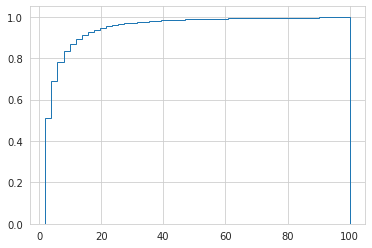

In [28]:
data_interaction_plot.loc[data_interaction_plot['count']>=100., 'count'] = 100.
plt.hist(data_interaction_plot['count'], 50, density=True, histtype='step', cumulative=True)

(array([0.40201475, 0.5184339 , 0.61158999, 0.68563714, 0.74524873,
        0.81888047, 0.84899782, 0.86987226, 0.89001973, 0.904663  ,
        0.92751064, 0.93633815, 0.94537335, 0.95160453, 0.95835497,
        0.96552082, 0.96874026, 0.97237512, 0.97559456, 0.97839859,
        0.98078721, 0.98421435, 0.98618756, 0.98732994, 0.98847232,
        0.989407  , 0.99106865, 0.99158791, 0.99231488, 0.99273029,
        0.99356112, 0.99408038, 0.99428809, 0.99480735, 0.99522276,
        0.99584588, 0.99678056, 0.99688441, 0.99709212, 0.99719597,
        0.99729982, 0.99750753, 0.99792294, 0.99813065, 0.99833835,
        0.99844221, 0.99844221, 0.99864991, 0.99906532, 0.99916918,
        0.99916918, 0.99916918, 0.99916918, 0.99916918, 0.99916918,
        0.99927303, 0.99927303, 0.99927303, 0.99948074, 0.99948074,
        0.99948074, 0.99948074, 0.99948074, 0.99958459, 0.99958459,
        0.99968844, 0.99979229, 0.99979229, 0.99979229, 0.99979229,
        0.99979229, 0.99979229, 0.99979229, 0.99

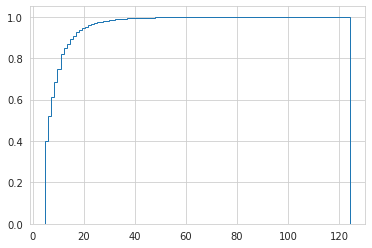

In [71]:
data_interaction_plot_per_user = data_interaction.groupby(['user_id']).size().reset_index(name='counts')
plt.hist(data_interaction_plot_per_user['counts'], 100, density=True, histtype='step', cumulative=True)

{'boxes': [<matplotlib.lines.Line2D at 0x7f04cb88ae50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f04cb890e50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f04cb897e90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f04cb897950>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f04cb8eb9d0>,
  <matplotlib.lines.Line2D at 0x7f04cb890910>]}

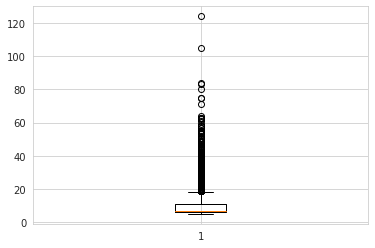

In [72]:
plt.boxplot(data_interaction_plot_per_user['counts'])

In [73]:
data_interaction_plot_per_user[['counts']].describe()

,counts
count,9629.000000
mean,9.457991
std,6.643312
min,5.000000
25%,6.000000
50%,7.000000
75%,11.000000
max,124.000000
